In [20]:
from datetime import datetime
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import numpy as np
import seaborn as sns

In [21]:
microsoft = pd.read_csv('MicrosoftStock.csv')
print(microsoft.head())

    index        date   open   high    low  close    volume  Name
0  390198  2013-02-08  27.35  27.71  27.31  27.55  33318306  MSFT
1  390199  2013-02-11  27.65  27.92  27.50  27.86  32247549  MSFT
2  390200  2013-02-12  27.88  28.00  27.75  27.88  35990829  MSFT
3  390201  2013-02-13  27.93  28.11  27.88  28.03  41715530  MSFT
4  390202  2013-02-14  27.92  28.06  27.87  28.04  32663174  MSFT


In [22]:
microsoft.shape

(1259, 8)

In [23]:
microsoft.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   index   1259 non-null   int64  
 1   date    1259 non-null   object 
 2   open    1259 non-null   float64
 3   high    1259 non-null   float64
 4   low     1259 non-null   float64
 5   close   1259 non-null   float64
 6   volume  1259 non-null   int64  
 7   Name    1259 non-null   object 
dtypes: float64(4), int64(2), object(2)
memory usage: 78.8+ KB


In [24]:
microsoft.describe()

,index,open,high,low,close,volume
count,1259.000000,1259.000000,1259.000000,1259.000000,1259.000000,1.259000e+03
mean,390827.000000,51.026394,51.436007,50.630397,51.063081,3.386946e+07
std,363.586303,14.859387,14.930144,14.774630,14.852117,1.958979e+07
min,390198.000000,27.350000,27.600000,27.230000,27.370000,7.425603e+06
25%,390512.500000,40.305000,40.637500,39.870000,40.310000,2.254879e+07
50%,390827.000000,47.440000,47.810000,47.005000,47.520000,2.938758e+07
75%,391141.500000,59.955000,60.435000,59.275000,59.730000,3.842024e+07
max,391456.000000,95.140000,96.070000,93.720000,95.010000,2.483542e+08


# Exploratory Data Analysis

EDA is an approach to analyzing the data using visual techniques. It is used to discover trends, and patterns, or to check assumptions with the help of statistical summaries and graphical representations.

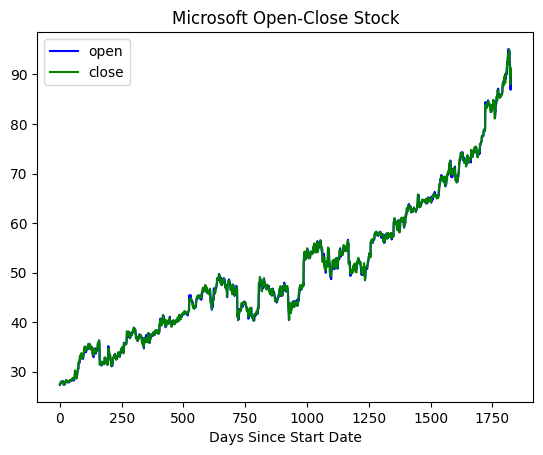

In [25]:
import pandas as pd
import matplotlib.pyplot as plt

# ... your existing code to load and process 'microsoft' DataFrame ...

# Convert 'date' column to datetime objects if not already
microsoft['date'] = pd.to_datetime(microsoft['date'])

# Calculate the date offsets (days since the first date)
microsoft['date_offset'] = (microsoft['date'] - microsoft['date'].min()).dt.days

plt.plot(microsoft['date_offset'], microsoft['open'], color="blue", label="open")
plt.plot(microsoft['date_offset'], microsoft['close'], color="green", label="close")
plt.title("Microsoft Open-Close Stock")
plt.xlabel('Days Since Start Date')  # Label the x-axis appropriately
plt.legend()
plt.show()

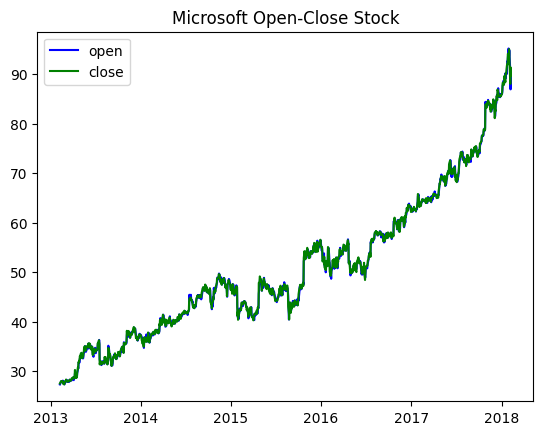

In [30]:
plt.plot(microsoft['date'],
         microsoft['open'],
         color="blue",
         label="open")
plt.plot(microsoft['date'],
         microsoft['close'],
         color="green",
         label="close")
plt.title("Microsoft Open-Close Stock")
plt.legend()

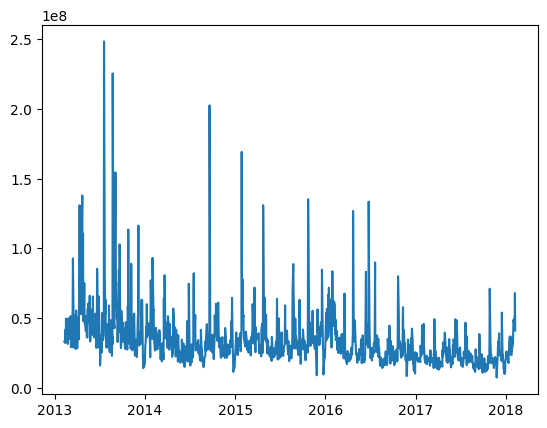

In [26]:
plt.plot(microsoft['date'],
         microsoft['volume'])
plt.show()

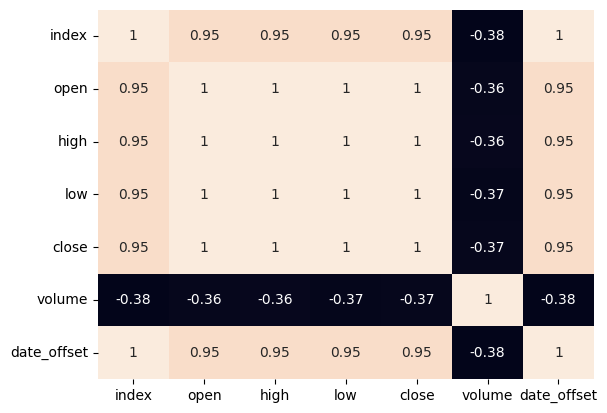

In [29]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

# Select only numeric columns for correlation calculation
numeric_microsoft = microsoft.select_dtypes(include=['number'])

sns.heatmap(numeric_microsoft.corr(),
            annot=True,
            cbar=False)
plt.show()

Now, let’s just plot the Close prices of Microsoft Stock for the time period of 2013 to 2018 which is for a span of 5 years.

Text(0.5, 1.0, 'Microsoft Stock Prices')

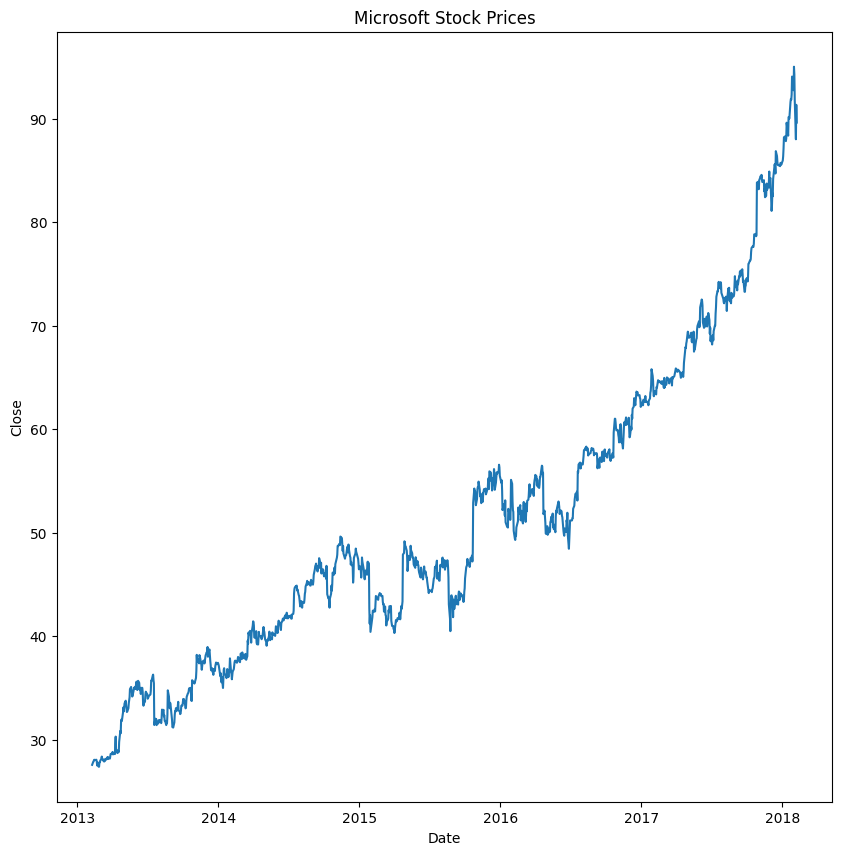

In [31]:
microsoft['date'] = pd.to_datetime(microsoft['date'])
prediction = microsoft.loc[(microsoft['date']
                            > datetime(2013, 1 ,1))
                            & (microsoft['date']
                               < datetime(2018,1 ,1))]

plt.figure(figsize=(10, 10))
plt.plot(microsoft['date'], microsoft['close'])
plt.xlabel("Date")
plt.ylabel("Close")
plt.title("Microsoft Stock Prices")

In [42]:
# prepare the training set samples
msft_close = microsoft.filter(['close'])
dataset = msft_close.values
training = int(np.ceil(len(dataset) * 0.95))

# scale the data
ss = StandardScaler()
ss = ss.fit_transform(dataset)

train_data = ss[0:int(training), :]

x_train = []
y_train = []

# considering 60 as the batch size,
# create the X_train and y_train
for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])

x_train, y_train = np.array(x_train), np.array(y_train)
X_train = np.reshape(x_train,
                     (x_train.shape[0],
                      x_train.shape[1], 1))

# Build the Model

To tackle the Time Series or Stock Price Prediction problem statement, we build a Recurrent Neural Network model, that comes in very handy to memorize the previous state using cell state and memory state. Since RNNs are hard to train and prune to Vanishing Gradient, we use LSTM which is the RNN gated cell, LSTM reduces the problem of Vanishing gradients.

In [43]:
model = keras.models.Sequential()
model.add(keras.layers.LSTM(units=64,
                            return_sequences=True,
                            input_shape
                            =(X_train.shape[1], 1)))
model.add(keras.layers.LSTM(units=64))
model.add(keras.layers.Dense(128))
model.add(keras.layers.Dropout(0.5))
model.add(keras.layers.Dense(1))

print(model.summary())

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 60, 64)              │          16,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 64)                  │          33,024 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │           8,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 58,369 (228.00 KB)

 Trainable params: 58,369 (228.00 KB)

 Non-trainable params: 0 (0.00 B)

None


# Compile and Fit

While compiling a model we provide these three essential parameters:

1-


optimizer – This is the method that helps to optimize the cost function by using gradient descent.





2-


loss – The loss function by which we monitor whether the model is improving with training or not.






3-



metrics – This helps to evaluate the model by predicting the training and the validation data.

In [47]:
from keras.metrics import RootMeanSquaredError
model.compile(optimizer='adam',
              loss='mae',
              metrics=[RootMeanSquaredError()] )

history = model.fit(X_train, y_train,
                    epochs=20)

Epoch 1/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 6s 52ms/step - loss: 0.3201 - root_mean_squared_error: 0.4364
Epoch 2/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 2s 53ms/step - loss: 0.1065 - root_mean_squared_error: 0.1431
Epoch 3/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 3s 86ms/step - loss: 0.0950 - root_mean_squared_error: 0.1273
Epoch 4/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 4s 51ms/step - loss: 0.0898 - root_mean_squared_error: 0.1211
Epoch 5/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 2s 50ms/step - loss: 0.0848 - root_mean_squared_error: 0.1158
Epoch 6/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 3s 52ms/step - loss: 0.0905 - root_mean_squared_error: 0.1216
Epoch 7/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 3s 61ms/step - loss: 0.0908 - root_mean_squared_error: 0.1191
Epoch 8/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 3s 86ms/step - loss: 0.0831 - root_mean_squared_error: 0.1087
Epoch 9/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 2s 54ms/step - loss: 0.0902 - root_mean_squared_error: 0.1203
Epoch 10/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 2s 51ms/step - loss: 0.0801 - root_mean_squared_error: 0.1061

# Model Evaluation

Now as we have our model ready let’s evaluate its performance on the validation data using different metrics. For this purpose, we will first predict the class for the validation data using this model and then compare the output with the true labels.

In [49]:
testing = ss[training - 60:, :]
x_test = []
y_test = dataset[training:, :]
for i in range(60, len(testing)):
    x_test.append(testing[i-60:i, 0])

x_test = np.array(x_test)
X_test = np.reshape(x_test,
                    (x_test.shape[0],
                     x_test.shape[1], 1))

pred = model.predict(X_test)

2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 299ms/step


Now let’s plot the known data and the predicted price trends in the Microsoft Stock prices and see whether they align with the previous trends or totally different from them.

<ipython-input-51-694328a1272b>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['Predictions'] = pred


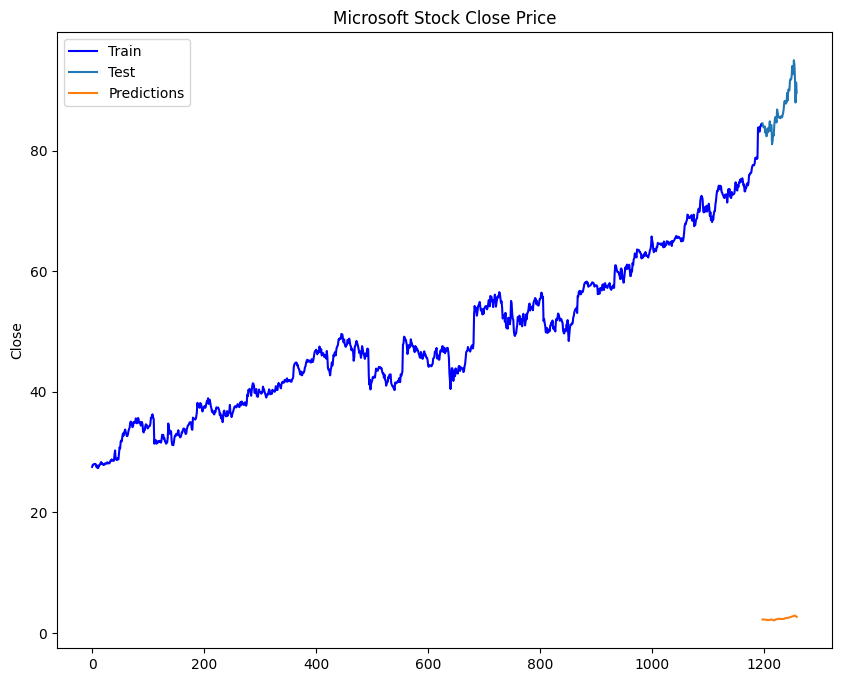

In [51]:
train = microsoft[:training]
test = microsoft[training:]
test['Predictions'] = pred

plt.figure(figsize=(10, 8))
plt.plot(train['close'], c="b")
plt.plot(test[['close', 'Predictions']])
plt.title('Microsoft Stock Close Price')
plt.ylabel("Close")
plt.legend(['Train', 'Test', 'Predictions'])